# Принятие решений в бизнесе

**Вместе с отделом маркетинга крупного интернет-магазина мы подготовили список гипотез для увеличения выручки.**  
**Цели проекта:**  
1. Приоритизировать гипотезы  
2. Запустить A/B-тест  
3. Проанализировать результаты  

**Для достижения целей необходимо выполнить следующие задачи:**  
+ Применить фреймворк ICE для приоритизации гипотез  
+ Применить фреймворк RICE для приоритизации гипотез  
+ Указать как изменилась приоритизация гипотез при применении RICE вместо ICE и объяснить почему так произошло  
+ Построить график кумулятивной выручки по группам  
+ Построить график кумулятивного среднего чека по группам  
+ Построитьграфик относительного изменения кумулятивного среднего чека группы B к группе A  
+ Построить график кумулятивного среднего количества заказов на посетителя по группам  
+ Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A  
+ Построить точечный график количества заказов по пользователям  
+ Посчитать 95-й и 99-й перцентили количества заказов на пользователя  
+ Выбрать границу для определения аномальных пользователей  
+ Построить точечный график стоимостей заказов  
+ Посчитать 95-й и 99-й перцентили стоимости заказов  
+ Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным  
+ Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным  
+ Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным  
+ Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным
+ Принять решение по результатам теста и объясниь его  

**Описание данных**  
В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами:  
+ Hypothesis — краткое описание гипотезы;  
+ Reach — охват пользователей по 10-балльной шкале;  
+ Impact — влияние на пользователей по 10-балльной шкале;  
+ Confidence — уверенность в гипотезе по 10-балльной шкале;  
+ Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале.  

В файле /datasets/orders.csv содержатся данные о заказах интернет-магазина после проведения A/B-теста:  
+ transactionId — идентификатор заказа;  
+ visitorId — идентификатор пользователя, совершившего заказ;  
+ date — дата, когда был совершён заказ;  
+ revenue — выручка заказа;  
+ group — группа A/B-теста, в которую попал заказ.  

В файле /datasets/visitors.csv содержатся данные о пользователях интернет-магазина после проведения A/B-теста:  
+ date — дата;  
+ group — группа A/B-теста;  
+ visitors — количество пользователей в указанную дату в указанной группе A/B-теста.  

**Импорт библиотек**

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import math as mth
import warnings
warnings.filterwarnings('ignore')

### Загрузка данных и подготовка к анализу

**1.1 Считаем CSV-файлы с данными с помощью библиотеки pandas и сохраним их в датафреймы**

In [2]:
hyp = pd.read_csv('/datasets/hypothesis.csv') #данные о гипотезах

In [3]:
orders = pd.read_csv('/datasets/orders.csv') #данные о заказах

In [4]:
visitors = pd.read_csv('/datasets/visitors.csv') #данные о пользователях

**1.2 Выведем первые строки каждого набора данных. Изучим общую информацию о каждом датафрейме**

In [5]:
hyp #выведем таблицу с гипотезами

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [6]:
hyp.info() #выведем общую информацию

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [7]:
orders.head(10) #выведем первые десять строк датафрейма с данными о заказах

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [8]:
orders.info() #выведем общую информацию

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [9]:
orders.isna().sum() #убедимся в отсутствии пропусков

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [10]:
orders.duplicated().sum() #проверим наличие дубликатов

0

Датафрейм с данными о заказах содержит 1197 строку и 5 столбцов, пропусков и явных дубликатов нет. Тип данных в столбцах с датой не соответствует заданным значениям.

In [11]:
visitors.head(10) #выведем первые десять строк датафрейма с данными о пользователях

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [12]:
visitors.info() #выведем общую информацию

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [13]:
visitors.isna().sum() #убедимся в отсутствии пропусков

date        0
group       0
visitors    0
dtype: int64

In [14]:
visitors.duplicated().sum() #проверим наличие дубликатов

0

Датафрейм с данными о визитах содержит 62 строки и 3 столбца, пропусков и явных дубликатов нет. Тип данных в столбцах с датой не соответствует заданным значениям.

**1.3 Проведем необходимые изменения**

In [15]:
#приведем названия столбцов к нижнему регистру
hyp.columns = hyp.columns.str.lower()
orders.columns = orders.columns.str.lower()
visitors.columns = visitors.columns.str.lower()

In [16]:
#изменим тип данных в столбцах с датой
orders['date'] = orders['date'].astype('datetime64[D]')
visitors['date'] = visitors['date'].astype('datetime64[D]')

In [17]:
orders.info() #выведем информацию по таблице для проверки изменений

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1197 non-null   int64         
 1   visitorid      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [18]:
visitors.info()#выведем информацию по таблице для проверки изменений

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


**Вывод:** данные готовы для дальнейшего анализа.

### Приоритизация гипотез

**2.1 Применим фреймворк ICE для приоритизации гипотез**

In [19]:
hyp['ICE'] = round(hyp['impact'] * hyp['confidence'] / hyp['efforts'], 2)

**2.2 Отсортируем их по убыванию приоритета**

In [20]:
pd.set_option('max_colwidth', 200)
hyp.sort_values(by='ICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


**2.3 Применим фреймворк RICE для приоритизации гипотез**

In [21]:
hyp['RICE'] = round(hyp['reach'] * hyp['impact'] * hyp['confidence'] / hyp['efforts'], 2)

**2.4 Отсортируем их по убыванию приоритета**

In [22]:
pd.set_option('max_colwidth', 200)
hyp.sort_values(by='RICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


**2.5 Как изменилась приоритизация гипотез при применении RICE вместо ICE и почему так произошло**

При применении фреймворка ICE приоритетными оказались гипотезы 8, 0 и 7 (16, 13 и 11 баллов соответственно), тогда как при применении фреймворка RICE приоритетными оказались гипотезы 7, 2, 0 и 6 (112, 56 и по 40 баллов соотвественно). Дело в том, что RICE включает в себя параметр 'reach' - охват предстоящих изменений, поэтому чем больше охват, тем приоритетнее гипотеза. При совокупности всех параметров гипотеза 7 является наиболее приоритетной.

### Анализ A/B-теста

**Мы провели A/B-тест и получили результаты, которые описаны в датафреймах 'orders' и 'visitors'**

**3.1 Построим график кумулятивной выручки по группам**

In [23]:
#создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

#получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
                                     .agg({'date' : 'max', 
                                           'group' : 'max', 
                                           'transactionid' : 'nunique', 
                                           'visitorid' : 'nunique', 
                                           'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

#получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                                       .agg({'date' : 'max', 
                                             'group' : 'max', 
                                             'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

#объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


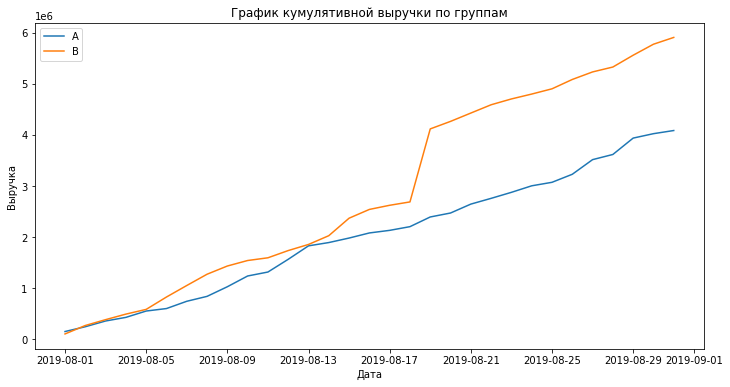

In [24]:
#датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

#датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(12,6))

#строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

#строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B') 


plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.legend(loc='best')
plt.show()

Поначалу выручка увеличивается почти равномерно, но после 5 августа группа B начинает лидировать. К 13 августа группа A догоняет группу B, но 18 августа у группы B происходит резкий скачок - возможно произошел всплеск числа заказов, либо в выборке появились очень дорогие заказы. 

**3.2 Построим график кумулятивного среднего чека по группам**

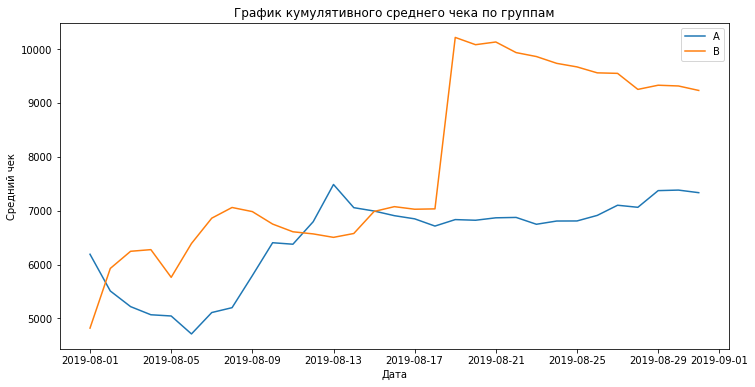

In [25]:
plt.figure(figsize=(12,6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.legend(loc='best')
plt.show()

Кумулятивное значение среднего чека почти вседа было выше у группы B. 11 и 15 августа средниц чек обеих групп сравнялся, 13 августа для группы A было пиковое значение. А для группы B пиковое значение пришлось на 19 августа, как раз после резкого скачка 18 августа. Возможно, причиной этому были крупные заказы. 

**3.3 Построим график относительного изменения кумулятивного среднего чека группы B к группе A**

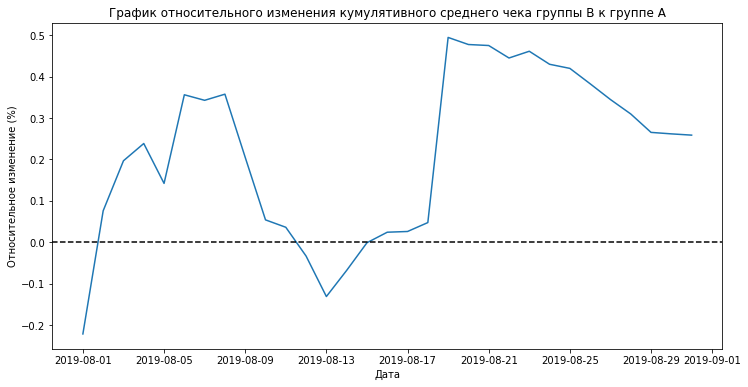

In [26]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(12,6))
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение (%)')
plt.show()

И снова мы можем наблюдать скачкообразные изменения в графике, даты как раз те же, что и на предыдущих графиках.

**3.4 Построим график кумулятивного среднего количества заказов на посетителя по группам**

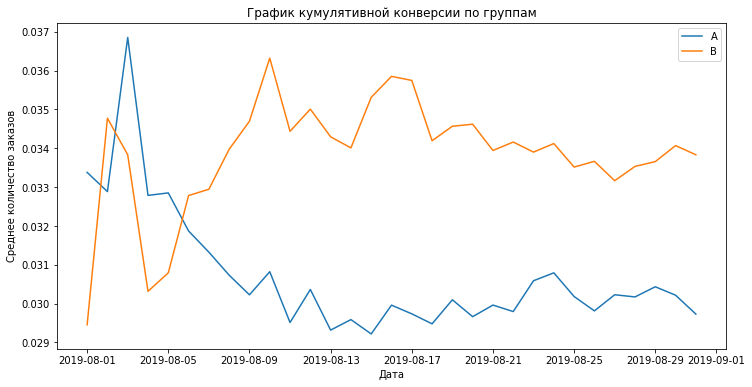

In [27]:
# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(12,6))
# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.title('График кумулятивной конверсии по группам')
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов')
plt.legend(loc='best')
plt.show()

Поначалу группы колебались, к 6 августа значения сравнялись, но затем у группы B среднее количество заказов вырвалось вперед, а у группы A просело. 

**3.5 Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A**

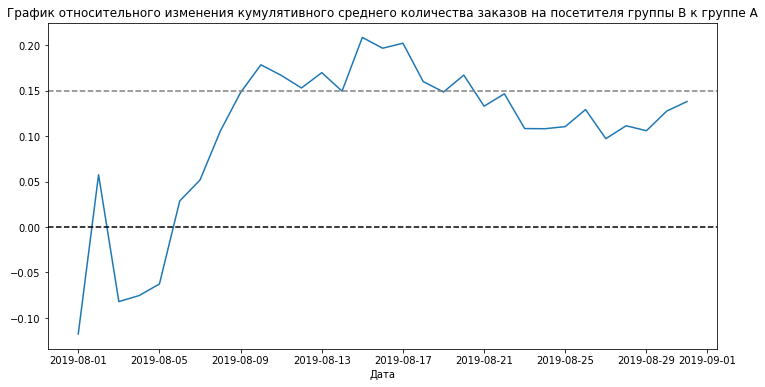

In [28]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(12,6))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')

plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.show()


После пяти дней наблюдений группа B вырвалась вперёд. После 18 августа среднее количество заказов на посетителя для группы B снова уменьшалось, но с 29 августа постепенно растет.

**3.6 Построим точечный график количества заказов по пользователям**

In [29]:
#выведем таблицу по количеству заказов на пользователя
ordersByUsers = (
    orders.groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsers.columns = ['visitorid', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

       visitorid  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


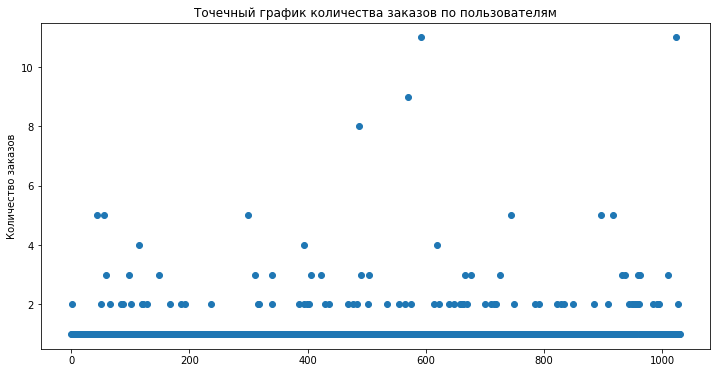

In [30]:
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.figure(figsize=(12,6))
plt.scatter(x_values, ordersByUsers['orders']);
plt.title('Точечный график количества заказов по пользователям')
plt.ylabel('Количество заказов')
plt.show()

Подавляющее большинство пользователей делали только один заказ. Значительное количество пользователей делало два заказа, но их точная доля не ясна. Больше двух заказов - лишь единичные случаи. 

**3.7 Посчитаем 95-й и 99-й перцентили количества заказов на пользователя и выберем границу для определения аномальных пользователей**

In [31]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

Не более 5% пользователей оформляли больше чем 2 заказа. И не более 1% пользователей заказывали более четырех раз. 
Разумно выбрать 2 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней.

**3.8 Построим точечный график стоимостей заказов**

In [32]:
#выведем таблицу стоимости заказов
orders.sort_values(by='revenue', ascending=False).head(10)

,transactionid,visitorid,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
682,1216533772,4266935830,2019-08-29,78990,B
662,1811671147,4266935830,2019-08-29,78990,A
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A


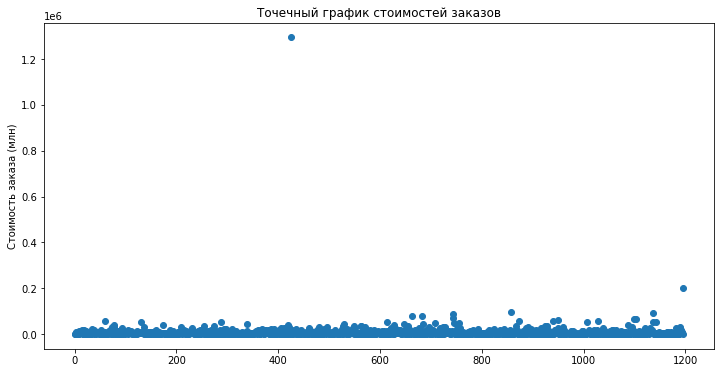

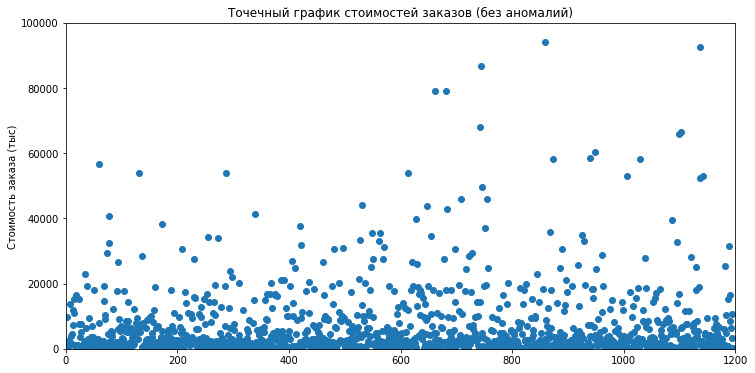

In [33]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(12,6))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимостей заказов')
plt.ylabel('Стоимость заказа (млн)')
plt.show()

plt.figure(figsize=(12,6))
plt.axis([0, 1200, 0, 100000])
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимостей заказов (без аномалий)')
plt.ylabel('Стоимость заказа (тыс)')
plt.show()

Абсолютное большинство заказов не превышает 100 000, но есть и аномалии - 202 740 и 1 294 500. Вполне возможно, что именно эти заказы влияли на графики кумулятивного среднего чека и кумулятивной выручки. 

**3.9 Посчитаем 95-й и 99-й перцентили стоимости заказов и выберем границу для определения аномальных заказов**

In [34]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Не более 5% заказов превысили 28000. И не более 1% заказов превысили 58233. Разумно выбрать 28000 за верхнюю границу стоимости заказов, и отсеять аномальные показатели по ней.

**3.10 Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным**

Нулевая гипотеза: различий в среднем количестве заказов на посетителя между группами нет.  
Альтернативная гипотеза: различия в среднем между группами есть.  

Уровень статистической значимости = 0.05  
Для проверки данной гипотезы используем непараметрический тест, т.к. имеющиеся аномалии могут исказить результаты.  

In [35]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 


sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("{0:.5f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.01679
0.138


Первое число - p-value = 0.01679 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, мы отвергаем. Группа B лидирует на 13,8%. 

**3.11 Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.**

Нулевая гипотеза: различий в среднем чеке между группами нет.  
Альтернативная гипотеза: различия в среднем чеке между группами есть. 

In [36]:
print('{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.729
0.259


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть статистически значимые различия, нет. Однако, средний чек группы B выше среднего чека группы A.

**3.12 Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.**

In [37]:
#очистим данные по количеству заказов
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], 95)]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], 95)]['userId'],
    ],
    axis=0,
)

In [38]:
#очистим данные по стоимости заказов
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 95)]['visitorid'] 
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

Нулевая гипотеза: различий в среднем количестве заказов на посетителя между группами нет.  
Альтернативная гипотеза: различия в среднем между группами есть.

In [39]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('{0:.5f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.01304
0.173


Так же, как и в случае с "сырыми" данными, нулевую гипотезу мы отвергаем. Среднее количество заказов на посетителя в группе B больше на 17,3%.

**3.13 Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным**

Нулевая гипотеза: различий в среднем чеке между группами нет.  
Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [40]:
print(
    '{0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.738
-0.020


Показатель p-value несколько вырос, но все равно причин отвергать нулевую гипотезу и считать, что в среднем чеке есть статистически значимые различия, нет. Вот только если в случае с "сырыми" данными средний чек группы B был выше среднего чека группы A, то теперь ситуация изменилась в обратную сторону.

**3.14 Примем решение по результатам теста и объясните его. Варианты решений:**  
1. Остановить тест, зафиксировать победу одной из групп.  
2. Остановить тест, зафиксировать отсутствие различий между группами.  
3. Продолжить тест.

Имеющиеся факты:
+ Среднее количество заказов как по "сырым", так и по "очищенным" данным больше у группы B;  
+ Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;  
+ График различия среднего количества заказов между группами сообщает, что результаты группы B лучше группы A.


**Вывод:** Проведенный тест соответствует всем необходимым критериям: размер корректен, проблема подглядывания исключена. При имеющихся данных сегмент B на самом деле лучше сегмента A: и до, и после очистки аномалий группа B лидировала по конверсии сначала на 13,8%, а после очистки данных на 17,3%. Исходя из обнаруженных фактов, тест следует остановить и зафиксировать победу группы B. 